In [1]:
import os
import numpy as np
import pandas as pd
path = "./data"
files = sorted(os.listdir(path))
files_len = len(files)
print(files_len)
usecols = ["star_mass", "surface_he4", "star_age", "log_Teff", "log_g", "log_L", "radius", "center_he4"]
data = {}

# 循环处理每个文件
for i in range(len(files)):
   data[i] = np.genfromtxt(path+'/'+files[i], names=True, skip_header=5)


3011


In [2]:

for i in range(len(files)):
    try:
        start_index = np.where(data[i]['center_he4'] < 0.93)[0][0]
    except IndexError:
        # print(f"Error ZAHB: {files[i]}")
        continue
    try:
            end_index=np.where(data[i]['center_he4']<0.001)[0][0]
    except IndexError:
        # print(f"Error TAHB: {files[i]}")
        # end_index=-1
        continue
    data[i]=data[i][slice(start_index, -1)]


[Text(0.5, 0, '$\\log T_{\\rm eff}/K$'), Text(0, 0.5, '$\\log L$ /$L_\\odot$')]

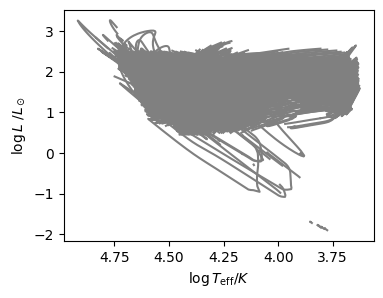

In [3]:
import matplotlib.pyplot as plt
plt.figure(dpi=100, figsize=(4, 3))
ax = plt.gca()
for i in range(len(files)):
    ax.plot(data[i]['log_Teff'],data[i]['log_L'], color='gray')

ax.invert_xaxis()
ax.set(xlabel=r'$\log T_{\rm eff}/K$', ylabel=r'$\log L$ /$L_\odot$')

[Text(0.5, 0, '$\\log T_{\\rm eff}/K$'), Text(0, 0.5, '$\\log g$')]

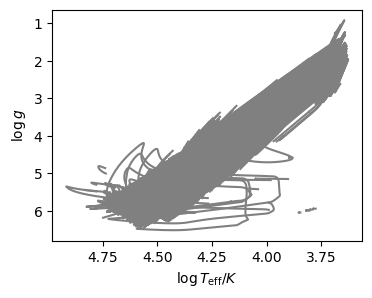

In [4]:
plt.figure(dpi=100, figsize=(4, 3))
ax = plt.gca()
for i in range(len(files)):
    ax.plot(data[i]['log_Teff'],data[i]['log_g'], color='gray')
ax.invert_xaxis()
ax.invert_yaxis()
ax.set(xlabel=r'$\log T_{\rm eff}/K$', ylabel=r'$\log g$')

[Text(0.5, 0, '$\\log T_{\\rm eff}/K$'), Text(0, 0.5, '$\\log L$ /$L_\\odot$')]

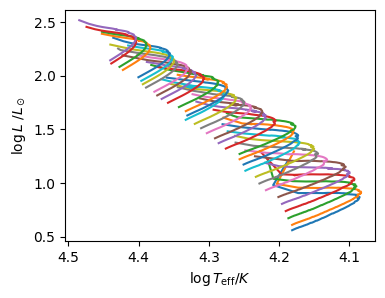

In [5]:
import re
plt.figure(dpi=100, figsize=(4, 3))
ax = plt.gca()
for i in range(len(files)):
        match = re.match(r'(\d+\.\d+)-(\d+\.\d+)-(\d+\.\d+).data', files[i])
        if match:
            mass = float(match.group(1))
            env_mass = float(match.group(2))
            Y_surf = float(match.group(3))
        else:
            print(f"Filename '{files[i]}' does not match the expected pattern.")
        if Y_surf != 0.20:continue
        if env_mass != 0.01:continue
        ax.plot(data[i]['log_Teff'],data[i]['log_L'])

ax.invert_xaxis()
ax.set(xlabel=r'$\log T_{\rm eff}/K$', ylabel=r'$\log L$ /$L_\odot$')

[Text(0.5, 0, '$age$'), Text(0, 0.5, '$\\log L$ /$L_\\odot$')]

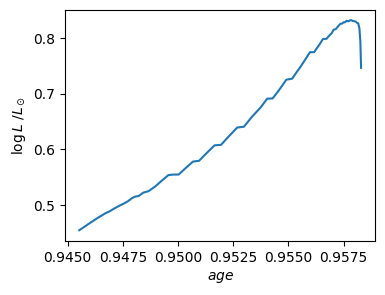

In [17]:
plt.figure(dpi=100, figsize=(4, 3))
ax = plt.gca()
for i in range(len(files)):
    ax.plot(data[i]['star_age'],data[i]['log_L'])
    break
# ax.invert_xaxis()
ax.set(xlabel=r'$age$', ylabel=r'$\log L$ /$L_\odot$')

[Text(0.5, 0, '$star_age$'), Text(0, 0.5, '$\\log g$$')]

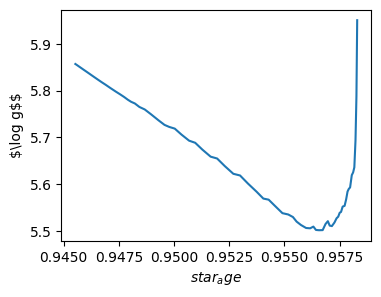

In [16]:
plt.figure(dpi=100, figsize=(4, 3))
ax = plt.gca()
for i in range(len(files)):
    # data[i]['star_age']=np.log10(data[i]['star_age'])
    ax.plot(data[i]['star_age'],data[i]['log_g'])
    break
# ax.invert_xaxis()
ax.set(xlabel=r'$age$', ylabel=r'$\log g$$')

[Text(0.5, 0, '$age$'), Text(0, 0.5, '$component$')]

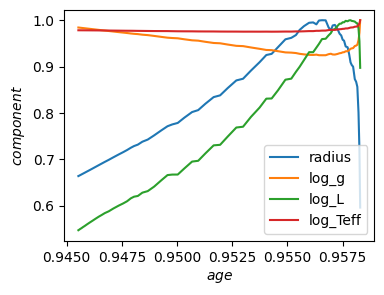

In [24]:
plt.figure(dpi=100, figsize=(4, 3))
ax = plt.gca()
for i in range(len(files)):
    ax.plot(data[i]['star_age'],data[i]['radius']/max(data[i]['radius']), label='radius')
    ax.plot(data[i]['star_age'],data[i]['log_g']/max(data[i]['log_g']),label='log_g')
    ax.plot(data[i]['star_age'],data[i]['log_L']/max(data[i]['log_L']),label='log_L')
    ax.plot(data[i]['star_age'],data[i]['log_Teff']/max(data[i]['log_Teff']),label='log_Teff')
    break
# ax.invert_xaxis()
ax.legend()
ax.set(xlabel=r'$age$', ylabel=r'$component$')